<a href="https://colab.research.google.com/github/aryaappu745/GRIP-Task-1/blob/main/Lab1_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Lab 1: Data Cleaning & Preprocessing -->
<h1 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  Lab 1: Data Cleaning &amp; Preprocessing
</h1>
<p style="font-size:1em; color: #1E6FB7; margin-top:0.2em;">
  Dr. Dehghani
</p>

<p style="font-size:1.1em; line-height:1.5;">
  Welcome to <strong>Lab 1</strong>, where we’ll take a real‐world dataset on student study habits and
  academic performance, and learn how to transform it from raw files into analysis-ready
  tables. You’ll get hands-on experience inspecting, cleaning, and engineering features
  that set the stage for later modeling tasks.
</p>

---

<h2 style="color: #1E6FB7;">🔖 Notebook Overview</h2>
<ul style="margin-left:1em;">
  <li><strong>Dataset:</strong> jayaantanaath/student-habits-vs-academic-performance</li>
  <li><strong>Goals:</strong>
    <ul>
      <li>Inspect and understand raw data</li>
      <li>Handle missing values</li>
      <li>Correct data types and inconsistencies</li>
      <li>Engineer basic features &amp; scale numeric values</li>
    </ul>
  </li>
</ul>

---

<h2 style="color: #1E6FB7;">🛠️ Task 1 – Explore the Kaggle Source</h2>
<p>
  <strong>Instructions:</strong> Go to the Kaggle dataset page:  
  <a href="https://www.kaggle.com/jayaantanaath/student-habits-vs-academic-performance" target="_blank">
    Click here
  </a> to view the dataset.
</p>
<ul style="margin-left:1em;">
  <li>Browse the <strong>Data</strong> tab: note file names &amp; formats.</li>
  <li>Check out available <strong>Notebooks (Codes)</strong> for inspiration.</li>
  <li>Visit the <strong>Discussion</strong> tab to see community insights.</li>
</ul>

---

<!-- Continue the rest of the lab with similarly unnumbered section headings -->



<h2 style="color: #1E6FB7; border-bottom: 1px solid #1E6FB7; padding-bottom: 0.2em;">
  🗂️ Load &amp; Inspect Data
</h2>

<p style="font-size:1em; line-height:1.5;">
  In this section, you will bring the dataset into your environment and become familiar with its structure and contents.
</p>

<ul style="margin-left:1em; line-height:1.4;">
  <li><strong>Load the CSV</strong> from the Dropbox link into a DataFrame.</li>
  <li><strong>Preview the data</strong> by viewing the first few rows to understand typical values and formatting.</li>
  <li><strong>List column names</strong> to see all available features and plan your cleaning strategy.</li>
  <li><strong>Check data types</strong> and non-null counts to identify any type mismatches or missing values.</li>
  <li><strong>Review summary statistics</strong> for numeric columns to spot outliers and understand distributions.</li>
</ul>


In [1]:
# 🔄 Updated: Load data directly from Dropbox and display header & dtypes

import pandas as pd

# 1. Direct Dropbox raw CSV link (dl=1 for direct download)
dropbox_url = (
    "https://www.dropbox.com/scl/fi/"
    "k2sz2u9wwfhkan7w9gotc/student_habits_performance.csv"
    "?rlkey=1ylhm44xz3srkzwzwxxiwrccm&dl=1"
)

# 2. Read into pandas
df = pd.read_csv(dropbox_url)

# 3. Quick sanity check: shape
print(f"DataFrame shape: {df.shape}\n")

# 4. Display first 5 rows
print("Preview of data:")
display(df.head())

# 5. Display column names and data types in a neat table
type_table = pd.DataFrame({
    "Column": df.columns,
    "Data Type": [str(dt) for dt in df.dtypes]
})
print("\nColumn types:")
display(type_table)


DataFrame shape: (1011, 16)

Preview of data:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



Column types:


,Column,Data Type
0,student_id,object
1,age,int64
2,gender,object
3,study_hours_per_day,float64
4,social_media_hours,float64
5,netflix_hours,float64
6,part_time_job,object
7,attendance_percentage,float64
8,sleep_hours,float64
9,diet_quality,object


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  Data Cleaning &amp; Preprocessing Overview
</h2>

<p style="font-size:1em; line-height:1.5;">
  Transforming raw data into clean, analysis‐ready form is crucial for reliable insights. For an in‐depth guide, see  
  <a href="https://www.datacamp.com/tutorial/guide-to-data-cleaning-in-python" target="_blank" style="color: #1E6FB7;">
    A Beginner’s Guide to Data Cleaning in Python
  </a>.
</p>

<div style="display:grid; grid-template-columns:1fr; gap:1em; margin-top:1em;">

  <div style="border:1px solid #A6CEE3; border-radius:8px; padding:1em; box-shadow:0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="margin-top:0; color:#1E6FB7;">1. 🧐 Identify &amp; Handle Missing Values</h3>
    <p style="margin:0.5em 0;">
      <strong>Why it matters:</strong> Missing data can bias results or break analyses if not addressed properly.  
      <em>Locate gaps and decide whether to drop, impute, or flag them.</em>
    </p>
    <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; margin:0;">
<code># count missing per column
df.isna().sum()</code>
    </pre>
  </div>

  <div style="border:1px solid #A6CEE3; border-radius:8px; padding:1em; box-shadow:0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="margin-top:0; color:#1E6FB7;">2. 🗑️ Remove Duplicates</h3>
    <p style="margin:0.5em 0;">
      <strong>Why it matters:</strong> Duplicate records inflate sample size and distort patterns.  
      <em>Eliminate redundant entries to ensure clean counts and unbiased models.</em>
    </p>
    <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; margin:0;">
<code># drop duplicates in-place
df.drop_duplicates(inplace=True)</code>
    </pre>
  </div>

  <div style="border:1px solid #A6CEE3; border-radius:8px; padding:1em; box-shadow:0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="margin-top:0; color:#1E6FB7;">3. 🔄 Correct Data Types</h3>
    <p style="margin:0.5em 0;">
      <strong>Why it matters:</strong> Proper types enable accurate computations and visualizations.  
      <em>Convert columns (e.g., dates, categoricals) to their appropriate types.</em>
    </p>
    <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; margin:0;">
<code># convert date column
df['date'] = pd.to_datetime(df['date'])</code>
    </pre>
  </div>

  <div style="border:1px solid #A6CEE3; border-radius:8px; padding:1em; box-shadow:0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="margin-top:0; color:#1E6FB7;">4. 🚨 Detect &amp; Treat Outliers</h3>
    <p style="margin:0.5em 0;">
      <strong>Why it matters:</strong> Outliers can skew statistics and model performance.  
      <em>Use IQR or z-score methods to identify and handle extreme values.</em>
    </p>
    <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; margin:0;">
<code># z-score filter
df = df[(df['score'] - df['score'].mean()).abs() &lt; 3*df['score'].std()]</code>
    </pre>
  </div>

  <div style="border:1px solid #A6CEE3; border-radius:8px; padding:1em; box-shadow:0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="margin-top:0; color:#1E6FB7;">5. 📊 Feature Scaling &amp; Encoding</h3>
    <p style="margin:0.5em 0;">
      <strong>Why it matters:</strong> Models often assume scaled inputs and numeric representations.  
      <em>Normalize numeric features and encode categorical variables for downstream analysis.</em>
    </p>
    <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; margin:0;">
<code># min-max scaling
from sklearn.preprocessing import MinMaxScaler
df['hours_scaled'] = MinMaxScaler().fit_transform(df[['hours']])</code>
    </pre>
  </div>

</div>


<h2 style="color: #1E6FB7; border-bottom: 1px solid #1E6FB7; padding-bottom: 0.2em;">
  🎯 Task – Define Your Analytical Questions
</h2>

<p style="font-size:1em; line-height:1.5;">
  Look over the loaded dataset and think about what insights you want to uncover.  
  <strong>In the box below, write three questions</strong> you’d like to answer based on the data.
</p>

<pre style="background:#f0f8ff; padding:1em; border-radius:4px; font-family:monospace;">
1. How do study habits and attendance relate to academic performance?

2. What is the relationship between lifestyle factors (sleep, exercise, diet) and students’ mental health?

3. Does digital media consumption (social media and Netflix hours) impact academic performance?
</pre>


In [2]:
# 🕒 Identify & Handle Missing Values
# This cell calculates the count and percentage of missing values per column,
# so you can decide whether to drop or impute data for each feature.

# Count missing values per column
missing_counts = df.isna().sum()

# Calculate missing percentage per column
missing_percent = (df.isna().mean() * 100).round(2)

# Create a summary table
missing_overview = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
})

# Display the overview for review
display(missing_overview)


,Missing Count,Missing %
student_id,0,0.00
age,0,0.00
gender,0,0.00
study_hours_per_day,0,0.00
social_media_hours,5,0.49
netflix_hours,0,0.00
part_time_job,0,0.00
attendance_percentage,0,0.00
sleep_hours,0,0.00
diet_quality,10,0.99


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  🛠️ Handling Missing Values
</h2>

<p style="font-size:1em; line-height:1.5;">
  When your data contains missing entries (NaNs), you have multiple strategies to clean it:
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li><strong>Drop rows</strong>: Remove any record with at least one NaN.</li>
  <li><strong>Drop columns</strong>: If a column has too many missing values, drop it entirely.</li>
  <li><strong>Impute</strong>: Replace NaNs in numeric columns with mean or median.</li>
  <li><strong>Forward/Backward fill</strong>: Propagate last or next valid observation.</li>
  <li><strong>Flag missingness</strong>: Create a Boolean column indicating where data was missing.</li>
</ul>

<p style="font-size:1em; line-height:1.5;">
  Below is an example code cell that <em>drops rows</em> containing any missing values.
</p>


In [3]:
# 🗑️ Drop Rows with Missing Values
# This cell removes any rows that contain at least one NaN,
# then prints the remaining missing counts to confirm.

df = df.dropna()
print("Remaining missing per column:")
print(df.isna().sum())


Remaining missing per column:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  🔍 Identifying Duplicates
</h2>

<p style="font-size:1em; line-height:1.5;">
  Before cleaning duplicates, you should detect how many and where they occur:
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li>Use <code>df.duplicated()</code> to mark duplicate rows.</li>
  <li>Count total duplicates with <code>df.duplicated().sum()</code>.</li>
  <li>View sample duplicates via <code>df[df.duplicated()]</code>.</li>
</ul>


In [4]:
# 🔍 Identify Duplicate Rows
# This cell computes the number of duplicate rows and displays a sample for review.

# Count total duplicate rows
dup_count = df.duplicated().sum()
print(f"Total duplicate rows: {dup_count}")

# Display first 5 duplicate rows (if any)
if dup_count > 0:
    display(df[df.duplicated()].head())
else:
    print("No duplicate rows found.")


Total duplicate rows: 6


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
286,S1106,22,Male,3.3,0.4,0.8,No,83.3,9.1,Good,6,High School,Good,4,Yes,82.3
288,S1108,22,Female,2.4,1.9,2.1,No,93.3,6.6,Poor,4,High School,Average,9,Yes,60.0
289,S1109,23,Female,5.4,2.4,2.5,No,95.7,6.0,Fair,2,High School,Good,2,No,77.5
290,S1110,24,Male,5.1,2.9,1.6,No,64.3,6.5,Fair,3,Bachelor,Average,9,Yes,86.5
291,S1111,23,Female,4.4,1.9,0.8,No,84.8,8.3,Good,1,High School,Average,3,No,76.9


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  🛠️ Handling Duplicate Records
</h2>

<p style="font-size:1em; line-height:1.5;">
  After identifying duplicates, you can choose one of the following approaches:
</p>
<ul style="margin-left:1.2em; line-height:1.4;">
  <li><strong>Drop all duplicates:</strong> Keep only the first occurrence of each row.</li>
  <li><strong>Drop based on specific columns:</strong> Remove duplicates considering a subset of key features.</li>
  <li><strong>Aggregate duplicates:</strong> Group duplicates and compute summary statistics (e.g., average, sum).</li>
  <li><strong>Flag duplicates:</strong> Add a Boolean column marking which rows were duplicates for downstream handling.</li>
</ul>

<p style="font-size:1em; line-height:1.5;">
  Below is an example that <em>drops all duplicate rows</em> and then verifies that none remain.
</p>


In [5]:
# 🗑️ Drop Duplicate Rows & Verify
# Remove duplicate records, keep only the first entry, then confirm no duplicates remain.

# Initial duplicate count
initial = df.duplicated().sum()
print(f"Duplicates before removal: {initial}")

# Drop duplicates
df = df.drop_duplicates()

# Confirm removal
remaining = df.duplicated().sum()
print(f"Duplicates after removal: {remaining}")


Duplicates before removal: 6
Duplicates after removal: 0


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  🔄 Correct Data Types
</h2>

<p style="font-size:1em; line-height:1.5;">
  It’s important that each feature has the right data type so pandas and downstream models handle them correctly.
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li><strong>Convert dates:</strong> Strings → <code>datetime</code> for time-based operations.</li>
  <li><strong>Categoricals:</strong> Strings with limited unique values → <code>category</code> to save memory and enable category-specific methods.</li>
  <li><strong>Numerics:</strong> Ensure numeric-looking strings are <code>int</code> or <code>float</code>.</li>
  <li><strong>Booleans:</strong> Convert true/false flags to <code>bool</code>.</li>
  <li><strong>Check consistency:</strong> Look for mixed types in a column (e.g. numbers + text) and clean them.</li>
</ul>

<p style="font-size:1em; line-height:1.5;">
  Below is an example that casts a date column and a categorical column, then verifies the new types.
</p>


In [6]:
# 🕒 Show Column Types Before & After Refinement

# Display original types
print("🔹 Before Refinement:")
print(df.dtypes, "\n")

# ── Apply Necessary Conversions ──
df['gender'] = df['gender'].astype('category')  # convert to categorical
df['part_time_job'] = df['part_time_job'].map({'Yes': True, 'No': False})  # Yes/No → bool
df['extracurricular_participation'] = df['extracurricular_participation'].map(
    {'Yes': True, 'No': False}
)  # Yes/No → bool

if 'student_id' in df.columns:
    df.set_index('student_id', inplace=True)  # promote to index

# Display updated types
print("🔹 After Refinement:")
print(df.dtypes)

🔹 Before Refinement:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object 

🔹 After Refinement:
age                                 int64
gender                           category
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                        bool
attendance_percentage             f

<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  🔎 Inspect Original Data &amp; Column Types
</h2>

<p style="font-size:1em; line-height:1.5;">
  First, review the raw DataFrame and its data types to understand what you have.  
  Use <code>df.head()</code> and <code>df.dtypes</code> (or the table you generated) to see all columns and their types.
</p>

<p style="font-size:1em; line-height:1.5;">
  <strong>In the box below, list three important changes or improvements you would make</strong> to the data types or column setup to streamline analysis (e.g., converting to categorical, setting a proper index, mapping yes/no to boolean).
</p>

<pre style="background:#f0f8ff; padding:1em; border-radius:4px; font-family:monospace;">
1. Change data type of part_time_job to bool

2. Change data type of extracurricular_participation to bool

3. Convert gender to categorical
</pre>


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom: 0.3em;">
  📋 Implemented Data Type Improvements
</h2>

<p style="font-size:1em; line-height:1.5;">
  Based on your current types, here are a few recommendations to streamline analysis and save memory:
</p>
a
<ul style="margin-left:1.2em; line-height:1.4;">
  <li><strong>student_id → index:</strong> Set as the DataFrame index rather than a generic object column.</li>
  <li><strong>gender → category:</strong> Convert to <code>category</code> for faster group‐by operations.</li>
  <li><strong>part_time_job &amp; extracurricular_participation → bool</strong>:  
    These “Yes/No” flags can become <code>bool</code> for clarity.</li>
  <li><strong>diet_quality, parental_education_level, internet_quality → categorical / ordinal</strong>:  
    Map to ordered categories (e.g., “Poor”→1, “Average”→2, “Good”→3).</li>
  <li><strong>mental_health_rating → category</strong>:  
    If it’s on a fixed scale (e.g., 1–5), consider treating it as <code>category</code>.</li>
</ul>


<h2 style="color: #1E6FB7; border-bottom: 2px solid #1E6FB7; padding-bottom:0.3em;">
  🚨 Detect &amp; Treat Outliers
</h2>

<p style="font-size:1em; line-height:1.5;">
  Outliers are extreme values that deviate significantly from the rest of your data.  
  They can distort statistical analyses, bias model training, and lead to misleading insights.
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li><strong>Why it matters:</strong> Removing or adjusting outliers ensures more robust metrics (mean, variance) and better model performance.</li>
  <li><strong>Identify outliers:</strong>
    <ul>
      <li>IQR method: Values below Q1−1.5×IQR or above Q3+1.5×IQR</li>
      <li>Z-score method: Rows where |z| > 3</li>
      <li>Visual inspection: Boxplots, scatter plots, or histograms</li>
    </ul>
  </li>
  <li><strong>Treatment options:</strong>
    <ul>
      <li>Delete outlier rows entirely</li>
      <li>Winsorize: Cap/floor values at chosen percentiles</li>
      <li>Transform data: Log, square root, or other normalization</li>
      <li>Impute extreme values with a statistical boundary (e.g., replace above-95th percentile with the 95th percentile)</li>
    </ul>
  </li>
</ul>

<p style="font-size:1em; line-height:1.5;">
  <em>Example code snippet (remove rows with |z| > 3):</em>
  <pre style="background:#F0F8FF; padding:0.5em; border-radius:4px; display:inline-block;">
    from scipy import stats  
    z = stats.zscore(df['numeric_column'].dropna())  
    df_clean = df.loc[z.abs() <= 3]
  </pre>
</p>


<h2 style="color: #1E6FB7; border-bottom:2px solid #1E6FB7; padding-bottom:0.3em;">
  🚨 Remove Outliers from `sleep_hours`
</h2>

<p style="font-size:1em; line-height:1.5;">
  The following cell drops any rows where `sleep_hours` lies outside the 1.5 × IQR bounds, then shows you how many were removed and the new DataFrame shape.
</p>


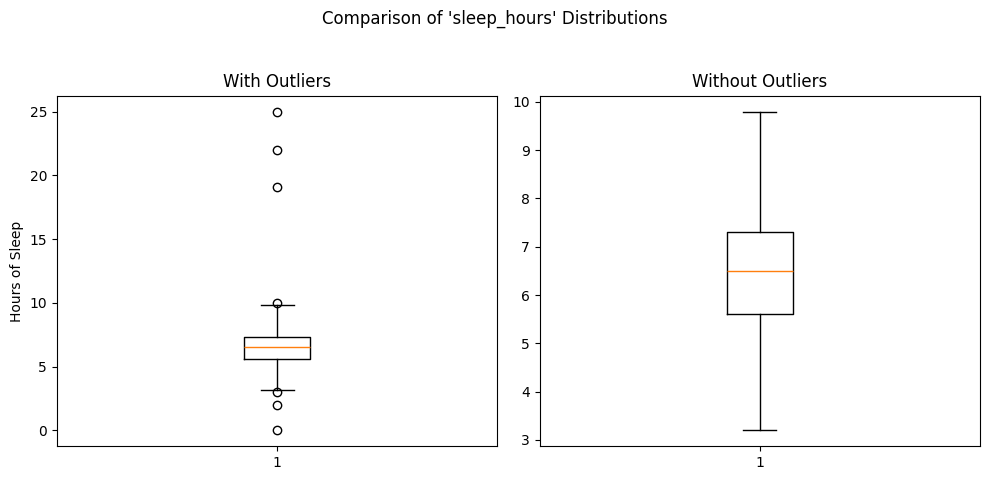

In [7]:
# 📊 Compare Box Plots: With vs Without Outliers
# Displays 'sleep_hours' distributions side-by-side for original and filtered data.

import matplotlib.pyplot as plt

# Compute IQR bounds
Q1 = df['sleep_hours'].quantile(0.25)
Q3 = df['sleep_hours'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Filter outliers
df_no_outliers = df[(df['sleep_hours'] >= lower) & (df['sleep_hours'] <= upper)]

# Plot setup
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Original data
axes[0].boxplot(df['sleep_hours'].dropna())
axes[0].set_title("With Outliers")
axes[0].set_ylabel("Hours of Sleep")

# Filtered data
axes[1].boxplot(df_no_outliers['sleep_hours'].dropna())
axes[1].set_title("Without Outliers")

# Overall title and layout
plt.suptitle("Comparison of 'sleep_hours' Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h2 style="color: #1E6FB7; border-bottom:2px solid #1E6FB7; padding-bottom:0.3em;">
  📊 Feature Scaling &amp; Selection Introduction
</h2>

<p style="font-size:1em; line-height:1.5;">
  After cleaning your data, two crucial steps remain before modeling:
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li>
    <strong>Feature Scaling:</strong>  
    Aligns numeric features to a common scale so that no single variable dominates due to its magnitude.  
    <em>Common techniques &amp; snippets:</em>
    <ul>
      <li>
        <code>StandardScaler</code> (zero mean, unit variance)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['col_scaled'] = scaler.fit_transform(df[['col']])</pre>
      </li>
      <li>
        <code>MinMaxScaler</code> (scales to [0,1])<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import MinMaxScaler
df['col_norm'] = MinMaxScaler().fit_transform(df[['col']])</pre>
      </li>
      <li>
        <code>RobustScaler</code> (median &amp; IQR)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import RobustScaler
df['col_robust'] = RobustScaler().fit_transform(df[['col']])</pre>
      </li>
    </ul>
  </li>
  <li>
    <strong>Feature Selection:</strong>  
    Chooses the most informative variables, reducing dimensionality and improving model performance.  
    <em>Common techniques &amp; snippets:</em>
    <ul>
      <li>
        <code>VarianceThreshold</code> (drop low-variance features)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
X_sel = sel.fit_transform(df[num_cols])</pre>
      </li>
      <li>
        Correlation filter (top-k features)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
# compute correlations and pick top k
corrs = df.corr()['target'].abs().sort_values(ascending=False)
top_features = corrs.iloc[1:k+1].index.tolist()</pre>
      </li>
      <li>
        Tree-based importances (<code>RandomForest</code>)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)</pre>
      </li>
    </ul>
  </li>
</ul>

<h2 style="color: #1E6FB7; border-bottom:2px solid #1E6FB7; padding-bottom:0.3em;">
  🚀 Assignment: Scaling &amp; Selection Choices
</h2>

<p style="font-size:1em; line-height:1.5;">
  Now it’s your turn! From the techniques above, select <strong>two to three</strong> methods (at least one for scaling and one for selection). For each:
</p>

<ol style="margin-left:1.2em; line-height:1.4;">
  <li>Apply the method to your cleaned DataFrame.</li>
  <li>Visualize or summarize the before &amp; after effects (e.g., distribution plots, feature counts).</li>
  <li>Write a brief observation (2–3 sentences) on how this technique impacted your data.</li>
</ol>

<p style="font-size:1em; line-height:1.5;">
  When complete, save your final DataFrame as <code>student_habits_cleaned.csv</code> and submit your code along with your observations as part of your analysis report.
</p>


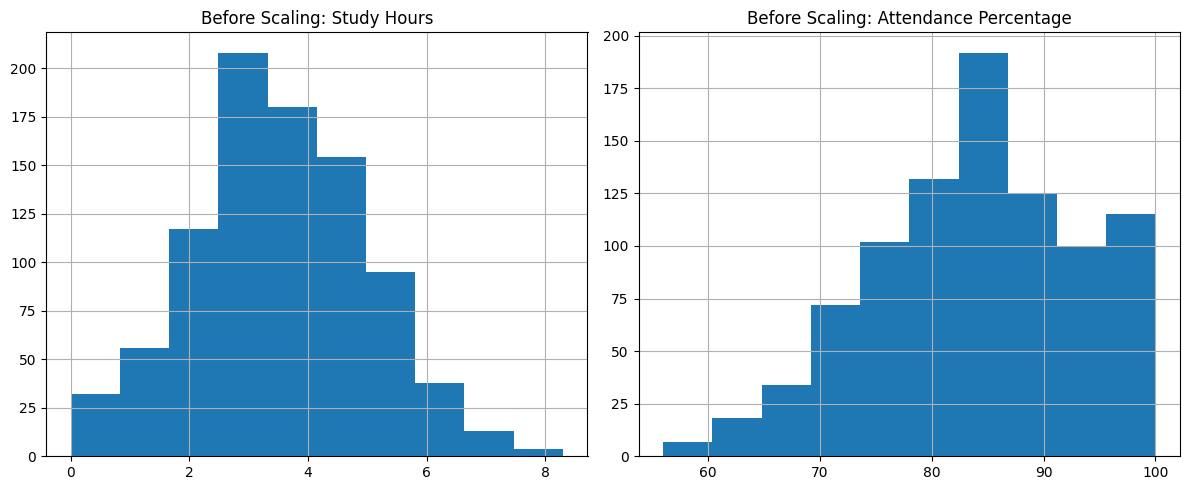

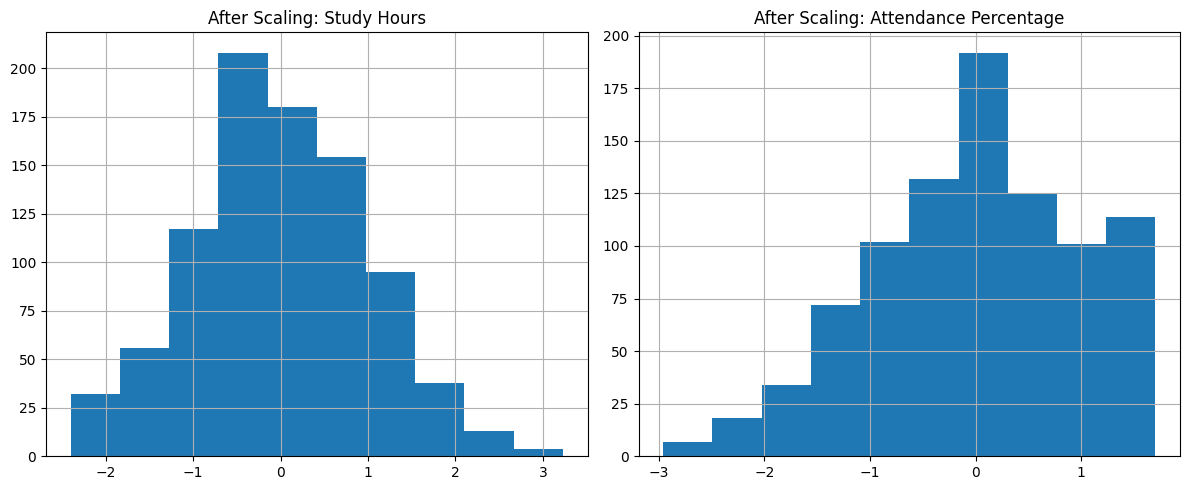

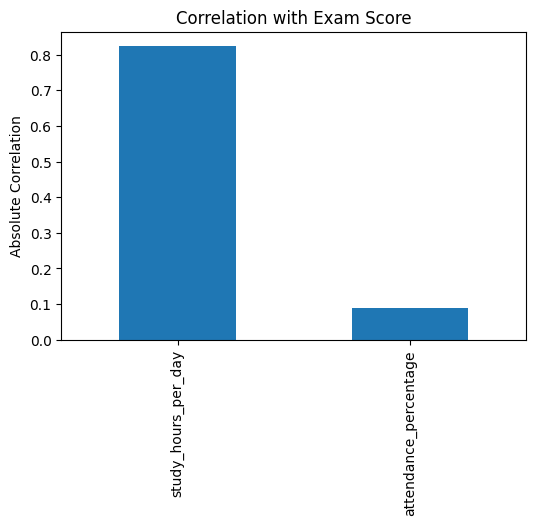

Top features for exam_score: ['exam_score', 'study_hours_per_day', 'attendance_percentage']


In [8]:
# Question 1
# How do study habits and attendance relate to academic performance?

from sklearn.preprocessing import StandardScaler

# Select relevant columns
cols_q1 = ['study_hours_per_day', 'attendance_percentage', 'exam_score']
df_q1 = df[cols_q1].copy()

# Plot before scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_q1[['study_hours_per_day', 'attendance_percentage']].hist(ax=axes)
axes[0].set_title('Before Scaling: Study Hours')
axes[1].set_title('Before Scaling: Attendance Percentage')
plt.tight_layout()
plt.show()

# Apply StandardScaler
scaler = StandardScaler()
df_q1[['study_hours_per_day', 'attendance_percentage']] = scaler.fit_transform(
    df_q1[['study_hours_per_day', 'attendance_percentage']]
)

# Plot after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_q1[['study_hours_per_day', 'attendance_percentage']].hist(ax=axes)
axes[0].set_title('After Scaling: Study Hours')
axes[1].set_title('After Scaling: Attendance Percentage')
plt.tight_layout()
plt.show()

# Correlation with exam_score
correlations = df_q1.corr()['exam_score'].abs().sort_values(ascending=False)
top_features = correlations.index.tolist()

# Plot correlation bar chart
plt.figure(figsize=(6, 4))
correlations.drop('exam_score').plot(kind='bar')
plt.title('Correlation with Exam Score')
plt.ylabel('Absolute Correlation')
plt.show()

print("Top features for exam_score:", top_features)


**Question 1: How do study habits and attendance relate to academic performance?**

**Methods used:**
*   Feature Scaling - StandardScaler
*   Feature Selection - Correlation

StandardScaler successfully normalized both study hours and attendance percentage to have similar ranges centered around zero, making it much easier to compare their relative effects on academic performance. The correlation analysis clearly revealed that daily study hours has a dramatically stronger relationship with exam scores (around 0.8 correlation) compared to attendance percentage (around 0.1), which was somewhat surprising since attendance is often emphasized in academic settings

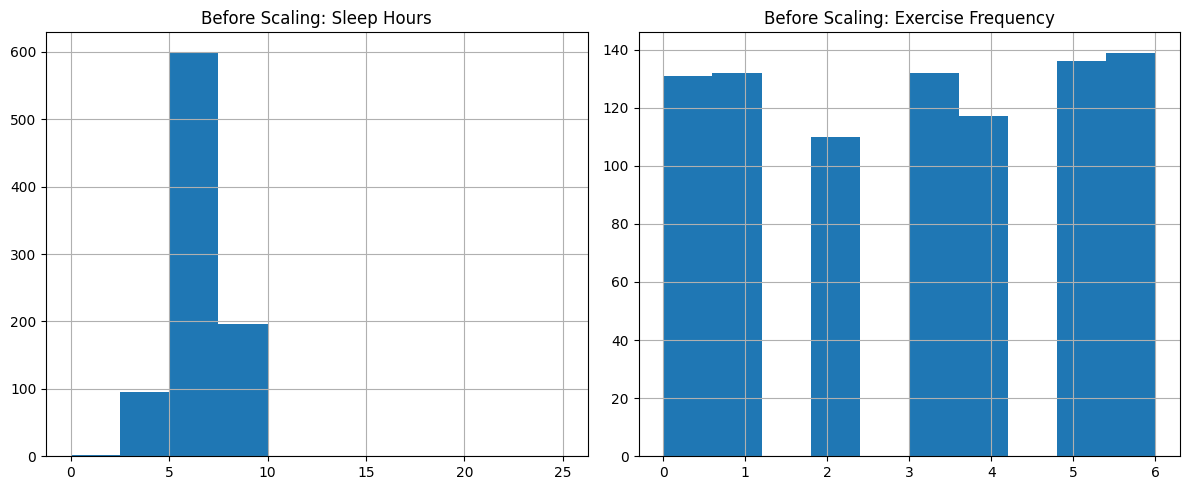

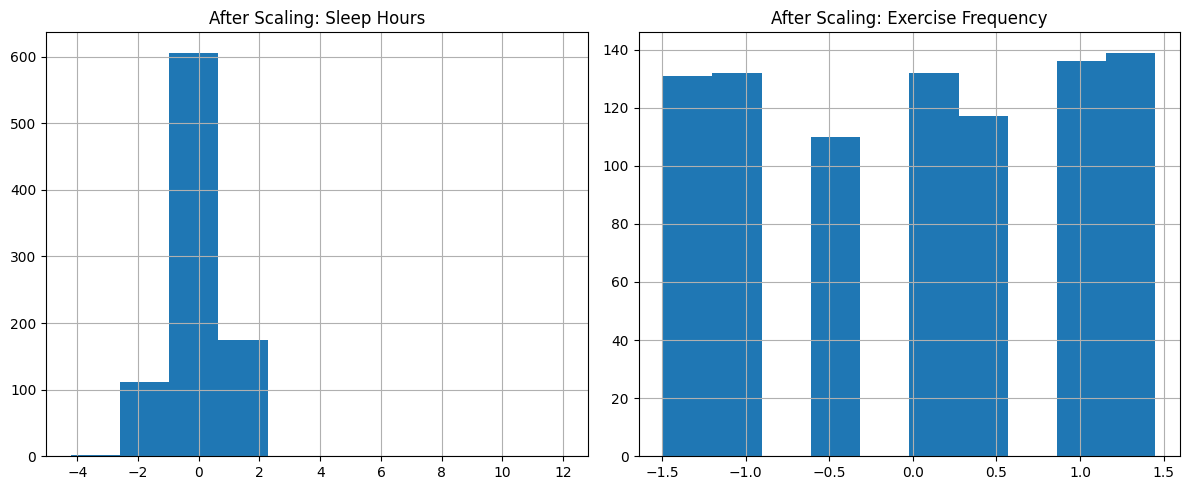

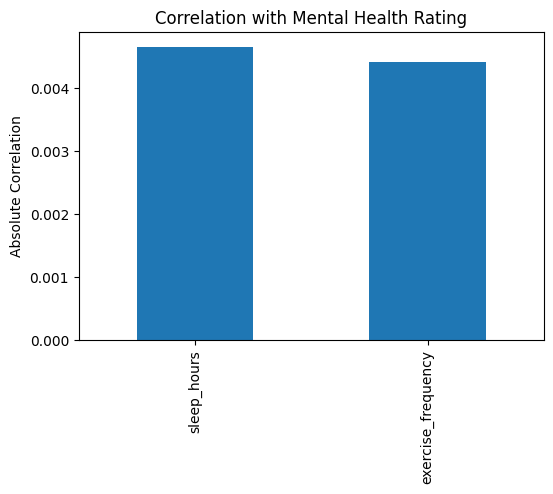

Top features for mental_health_rating: ['mental_health_rating', 'sleep_hours', 'exercise_frequency']


In [9]:
# Question 2
# What is the relationship between lifestyle factors (sleep, exercise) and students’ mental health?

from sklearn.preprocessing import StandardScaler

# Select relevant columns
cols_q2 = ['sleep_hours', 'exercise_frequency', 'mental_health_rating']
df_q2 = df[cols_q2].copy()

# Plot before scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_q2[['sleep_hours', 'exercise_frequency']].hist(ax=axes)
axes[0].set_title('Before Scaling: Sleep Hours')
axes[1].set_title('Before Scaling: Exercise Frequency')
plt.tight_layout()
plt.show()

# Apply StandardScaler
scaler = StandardScaler()
df_q2[['sleep_hours', 'exercise_frequency']] = scaler.fit_transform(
    df_q2[['sleep_hours', 'exercise_frequency']]
)

# Plot after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_q2[['sleep_hours', 'exercise_frequency']].hist(ax=axes)
axes[0].set_title('After Scaling: Sleep Hours')
axes[1].set_title('After Scaling: Exercise Frequency')
plt.tight_layout()
plt.show()

# Correlation with mental_health_rating
correlations_q2 = df_q2.corr()['mental_health_rating'].abs().sort_values(ascending=False)
top_features_q2 = correlations_q2.index.tolist()

# Plot correlation bar chart
plt.figure(figsize=(6, 4))
correlations_q2.drop('mental_health_rating').plot(kind='bar')
plt.title('Correlation with Mental Health Rating')
plt.ylabel('Absolute Correlation')
plt.show()

print("Top features for mental_health_rating:", top_features_q2)


**Question 2: What is the relationship between lifestyle factors (sleep, exercise) and students’ mental health?**

**Methods used:**
*   Feature Scaling - StandardScaler
*   Feature Selection - Correlation

By applying StandardScaler, both sleep hours and exercise frequency were brought to comparable scales, eliminating the original unit differences between continuous hours and discrete day counts. However, the correlation analysis revealed weak relationships with mental health ratings for both features, suggesting that these commonly cited wellness factors might not be as strongly linked to mental health outcomes as expected in this student population

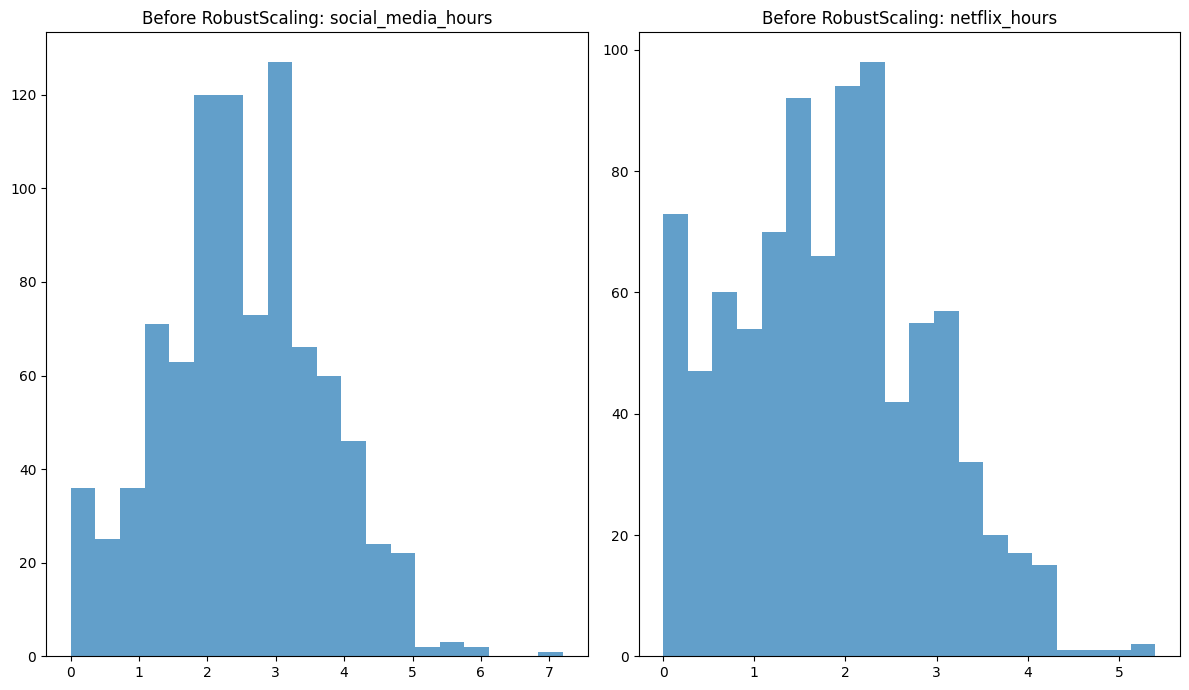

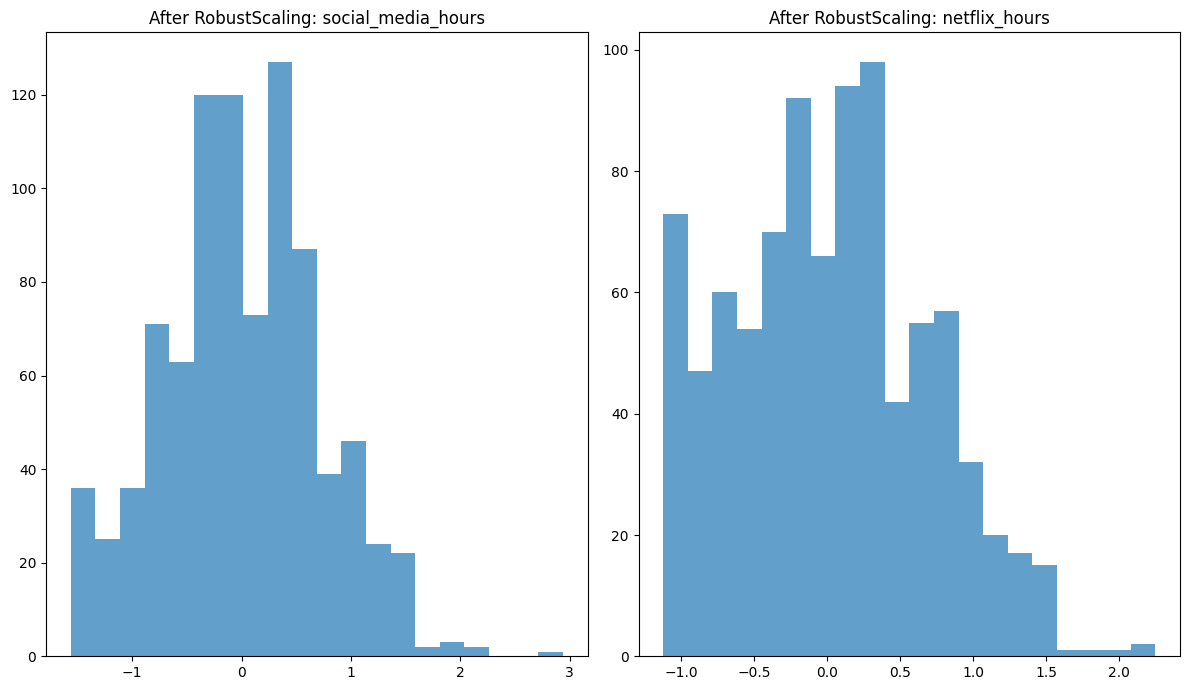

Variance of features before selection:
social_media_hours    0.530914
netflix_hours         0.448728
dtype: float64

Features selected by VarianceThreshold (variance > 0.1):
Selected: ['social_media_hours', 'netflix_hours']
Removed: [] 

Correlations with exam_score (absolute values):
social_media_hours    0.171753
netflix_hours         0.164327
Name: exam_score, dtype: float64


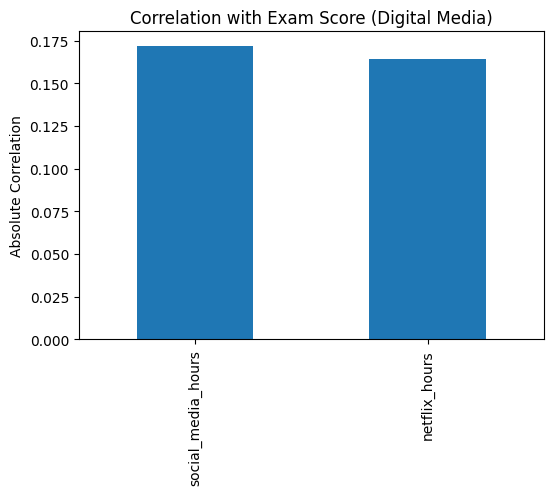

In [17]:
# Question 3
# Does digital media consumption impact academic performance?

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold

# Select columns
cols_q3 = ['social_media_hours', 'netflix_hours', 'exam_score']
df_q3 = df[cols_q3].copy()

# Apply RobustScaler (uses median and IQR, less sensitive to outliers)
scaler_robust = RobustScaler()
features_to_scale = ['social_media_hours', 'netflix_hours']

# Plot before scaling
fig, axes = plt.subplots(1, len(features_to_scale), figsize=(12, 7))

for i, col in enumerate(features_to_scale):
    axes[i].hist(df_q3[col], bins=20, alpha=0.7)
    axes[i].set_title(f'Before RobustScaling: {col}')

plt.tight_layout()
plt.show()

# Apply RobustScaler
df_q3[features_to_scale] = scaler_robust.fit_transform(df_q3_alt[features_to_scale])

# Plot after scaling
fig, axes = plt.subplots(1, len(features_to_scale), figsize=(12, 7))

for i, col in enumerate(features_to_scale):
    axes[i].hist(df_q3[col], bins=20, alpha=0.7)
    axes[i].set_title(f'After RobustScaling: {col}')

plt.tight_layout()
plt.show()

# Apply VarianceThreshold for feature selection
X_q3 = df_q3.drop('exam_score', axis=1)

# Calculate variance before selection
print("Variance of features before selection:")
variances_before = pd.Series(X_q3.var(), index=X_q3.columns).sort_values(ascending=False)
print(variances_before)

# Apply VarianceThreshold (remove features with variance < 0.1)
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_q3)

# Get selected feature names
selected_mask = selector.get_support()
selected_features_q3 = X_q3.columns[selected_mask].tolist()

print(f"\nFeatures selected by VarianceThreshold (variance > 0.1):")
print(f"Selected: {selected_features_q3}")
print(f"Removed: {[col for col in X_q3.columns if col not in selected_features_q3]}", "\n")

# Create final dataset
df_q3_final = df_q3[selected_features_q3 + ['exam_score']]

# Calculate absolute correlations with exam_score
correlation_matrix = df_q3_final.corr()
correlations_q3 = correlation_matrix.loc['exam_score', ['social_media_hours', 'netflix_hours']].abs().sort_values(ascending=False)
print("Correlations with exam_score (absolute values):")
print(correlations_q3)

# Plot the correlation bar chart (excluding exam_score itself)
plt.figure(figsize=(6, 4))
correlations_q3.plot(kind='bar')
plt.title('Correlation with Exam Score (Digital Media)')
plt.ylabel('Absolute Correlation')
plt.show()

**Question 3: Does digital media consumption impact academic performance?**

**Methods used:**
*   Feature Scaling - RobustScaler
*   Feature Selection - VarianceThreshold, Correlation

RobustScaler effectively handled the right-skewed distributions of social media and Netflix hours by centering them around their medians rather than means, which helped reduce the influence of students with extremely high digital media consumption. The VarianceThreshold method retained all features since they all showed sufficient variation across students, indicating that digital media usage patterns are quite diverse in this dataset. The output also showed that VarianceThreshold retained ALL features (none were removed), making the method redundant. This is why I tried the correlation method for this question as well - which showed that the relation between exam scores remained relatively weak for both features

In [18]:
# Save final dataset as a CSV file
df_q3_final.to_csv('student_habits_cleaned.csv', index=False)

from google.colab import files
files.download('student_habits_cleaned.csv')
